In [106]:
import random

import numpy as np


class SupportVectorMachine:
    def __init__(self, x_train, y_train, C, toler, max_iter):
        self.x_train = np.mat(x_train)
        self.y_train = np.mat(y_train)
        self.C = C
        self.toler = toler
        self.max_iter = max_iter
        m, n = np.shape(self.x_train)
        self.alphas = np.zeros((m, 1))
        self.b = 0

    #select to different alpha_i, alpha_j to
    def rand_select_j(self, i, m):
        j = i
        while (j == i):
            j = int(random.uniform(0, m))
        return j

    def clip_alpha(self, aj, H, L):
        if aj > H:
            aj = H
        if L > aj:
            aj = L
        return aj

    def smo(self):
        iters = 0
        m, n = np.shape(self.x_train)
        while iters < self.max_iter:
            alpha_pairs_changed = 0
            for i in range(m):
                W_i = np.dot(np.multiply(self.alphas, self.y_train).T, self.x_train)
                f_x_i = float(np.dot(W_i, self.x_train[i, :].T)) + self.b
                E_i = f_x_i - float(self.y_train[i])
                if ((self.y_train[i] * E_i < -self.toler) and (self.alphas[i] < self.C)) or (
                        (self.y_train[i] * E_i > self.toler) and (self.alphas[i] > 0)):
                    j = self.rand_select_j(i, m)
                    W_j = np.dot(np.multiply(self.alphas, self.y_train).T,
                                 self.x_train)
                    f_x_j = float(np.dot(W_j, self.x_train[j, :].T)) + self.b
                    E_j = f_x_j - float(self.y_train[j])
                    alpha_iold = self.alphas[i].copy()
                    alpha_jold = self.alphas[j].copy()
                    if (self.y_train[i] != self.y_train[j]):
                        L = max(0, self.alphas[j] - self.alphas[i])
                        H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
                    else:
                        L = max(0, self.alphas[j] + self.alphas[i] - self.C)
                        H = min(self.C, self.alphas[j] + self.alphas[i])
                    if H == L: continue
                    eta = 2.0 * self.x_train[i, :] * self.x_train[j, :].T - self.x_train[i, :] * self.x_train[i, :].T - \
                          self.x_train[j, :] * self.x_train[j, :].T
                    if eta >= 0: continue
                    self.alphas[j] = (self.alphas[j] - self.y_train[j] * (E_i - E_j)) / eta
                    self.alphas[j] = self.clip_alpha(self.alphas[j], H, L)
                    if (abs(self.alphas[j] - alpha_jold) < 0.00001):
                        continue
                    self.alphas[i] = self.alphas[i] + self.y_train[j] * self.y_train[i] * (alpha_jold - self.alphas[j])
                    b1 = self.b - E_i + self.y_train[i] * (alpha_iold - self.alphas[i]) * np.dot(self.x_train[i, :],
                                                                                                 self.x_train[i, :].T) + \
                         self.y_train[j] * (alpha_jold - self.alphas[j]) * np.dot(self.x_train[i, :],
                                                                                  self.x_train[j, :].T)

                    b2 = self.b - E_j + self.y_train[i] * (alpha_iold - self.alphas[i]) * np.dot(self.x_train[i, :],
                                                                                                 self.x_train[j, :].T) + \
                         self.y_train[j] * (alpha_jold - self.alphas[j]) * np.dot(self.x_train[j, :],
                                                                                  self.x_train[j, :].T)

                    if (0 < self.alphas[i]) and (self.C > self.alphas[i]):
                        self.b = b1
                    elif (0 < self.alphas[j]) and (self.C > self.alphas[j]):
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2.0
                    alpha_pairs_changed += 1
                if (alpha_pairs_changed == 0):
                    iters += 1
                else:
                    iters = 0

C:\Users\Polo\AppData\Local\Temp\ipykernel_20612\996502174.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_x_i = float(np.dot(W_i, self.x_train[i, :].T)) + self.b
C:\Users\Polo\AppData\Local\Temp\ipykernel_20612\996502174.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E_i = f_x_i - float(self.y_train[i])
C:\Users\Polo\AppData\Local\Temp\ipykernel_20612\996502174.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_x_j = float(np.dot(W_j, self.x_train

Text(0, 0.5, 'x2')

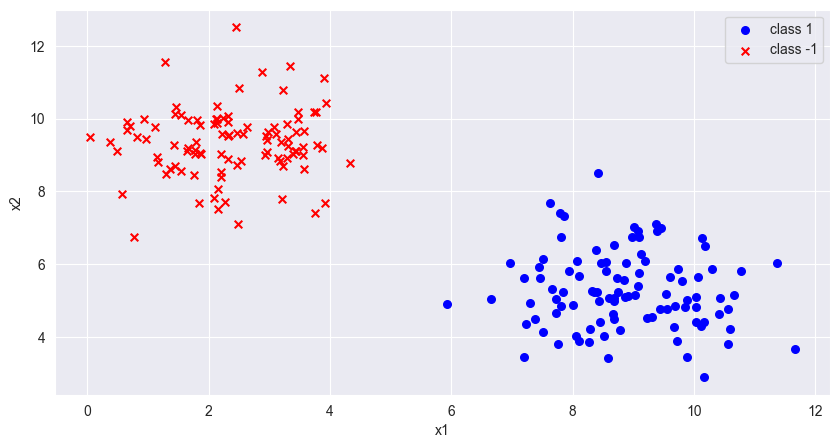

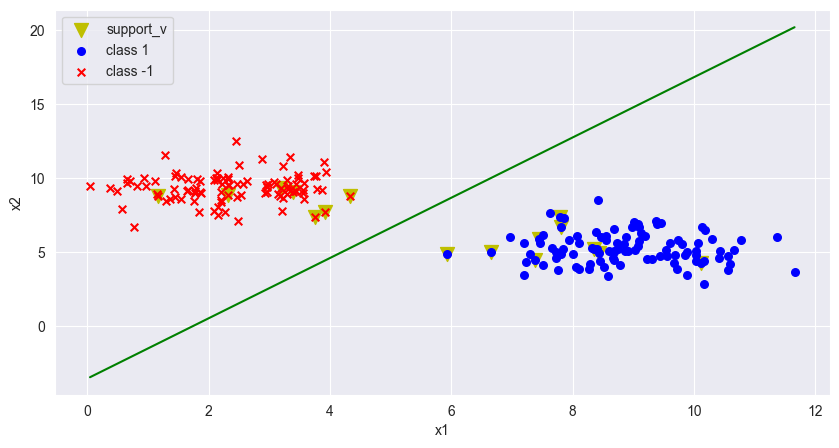

In [107]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

data, label = make_blobs(n_samples=200, n_features=2, centers=2)
for i in range(len(label)):
    if label[i] == 0:
        label[i] = -1
df = pd.DataFrame()
df['x1'] = data[:, 0]
df['x2'] = data[:, 1]
df['class'] = label
positive = df[df["class"] == 1]
negative = df[df["class"] == -1]
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(positive["x1"], positive["x2"], s=30, c="b", marker="o", label="class 1")
ax.scatter(negative["x1"], negative["x2"], s=30, c="r", marker="x", label="class -1")
ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
orig_data = df.values
cols = orig_data.shape[1]
data_mat = orig_data[:, 0:cols - 1]
label_mat = orig_data[:, cols - 1:cols]
model = SupportVectorMachine(data_mat, label_mat, 0.6, 0.001, 100)
model.smo()
support_x = []
support_y = []
class1_x = []
class1_y = []
class01_x = []
class01_y = []
for i in range(200):
    if model.alphas[i] > 0.0:
        support_x.append(data_mat[i, 0])
        support_y.append(data_mat[i, 1])
for i in range(200):
    if label_mat[i] == 1:
        class1_x.append(data_mat[i, 0])
        class1_y.append(data_mat[i, 1])
    else:
        class01_x.append(data_mat[i, 0])
        class01_y.append(data_mat[i, 1])
w_best = np.dot(np.multiply(model.alphas, label_mat).T, data_mat)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(support_x, support_y, s=100, c="y", marker="v", label="support_v")
ax.scatter(class1_x, class1_y, s=30, c="b", marker="o", label="class 1")
ax.scatter(class01_x, class01_y, s=30, c="r", marker="x", label="class -1")
a = min(data_mat[:, 0])
b = max(data_mat[:, 0])
lin_x = np.linspace(a, b, 200)
lin_y = (-float(model.b) - w_best[0, 0] * lin_x) / w_best[0, 1]
plt.plot(lin_x, lin_y, color="green")
ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")

D:\pycharm project\Machine_earning_basics\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'x2')

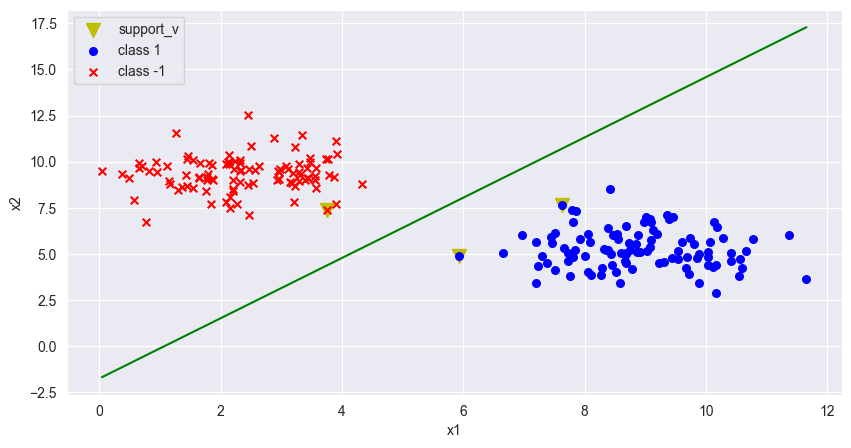

In [108]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
svc_model.fit(data_mat, label_mat)
class1_x = []
class1_y = []
class01_x = []
class01_y = []
for i in range(200):
    if label_mat[i] == 1:
        class1_x.append(data_mat[i, 0])
        class1_y.append(data_mat[i, 1])
    else:
        class01_x.append(data_mat[i, 0])
        class01_y.append(data_mat[i, 1])
w_best = svc_model.coef_
model_b = svc_model.intercept_[0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
           s=100, c="y", marker="v", label="support_v")
ax.scatter(class1_x, class1_y, s=30, c="b", marker="o", label="class 1")
ax.scatter(class01_x, class01_y, s=30, c="r", marker="x", label="class -1")
a = min(data_mat[:, 0])
b = max(data_mat[:, 0])
lin_x = np.linspace(a, b, 200)
lin_y = (-float(model_b) - w_best[0, 0] * lin_x) / w_best[0, 1]
plt.plot(lin_x, lin_y, color="green")
ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")